Templated from Preston's notebook

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [3]:
!pip install sunpy
!pip install zeep
!pip install drms
!pip install aiapy
!pip install wget

In [4]:
from sunpy.net import Fido, attrs as a
import astropy.units as u
import sunpy.map
import sunpy.io.fits as fits
import matplotlib.pyplot as plt
import numpy as np
import os.path

In [5]:
%cd drive/Shareddrives/Phys\ 477\ -\ Astro\ Project/sun_test_images

/content/drive/Shareddrives/Phys 477 - Astro Project/sun_test_images


In [6]:
eventfiles171 = os.listdir('171_xray_fits')
nullfiles171 = os.listdir('171_xray_null')
print(len(eventfiles171))
print(len(nullfiles171))

165
149


In [7]:
eventdata171 = [sunpy.map.Map('171_xray_fits/' + file).data for file in eventfiles171[:20]]
nulldata171 = [sunpy.map.Map('171_xray_null/' + file).data for file in nullfiles171[:20]]

In [16]:
testmap = eventmaps171[0]

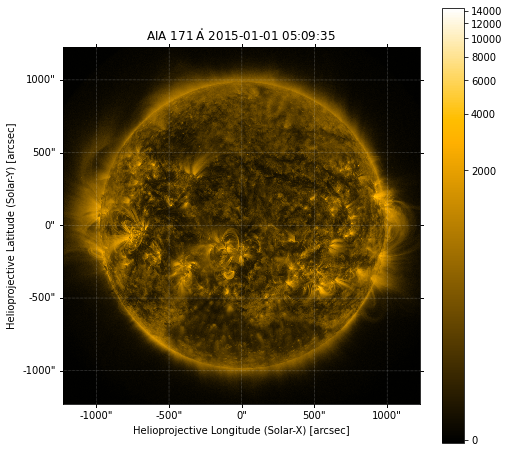

In [17]:
plt.figure(figsize=(8,8))
testmap.plot()
plt.colorbar()


# Copying a CNN image classification tutorial for this data
I'll try a few ways of setting up the CNN, I saw tutorials do things a few slightly different ways

In [8]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Create the convultional base - how would this be different for our data?

In [9]:
model = models.Sequential()
model.add(layers.AvgPool2D((32,32),input_shape=(4096,4096,1)))
model.add(layers.Conv2D(32, (3,3),activation='relu'))
model.add(layers.AvgPool2D())
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.AvgPool2D())
model.add(layers.Conv2D(64,(3,3),activation='relu'))


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
average_pooling2d (AveragePo (None, 128, 128, 1)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 32)      320       
_________________________________________________________________
average_pooling2d_1 (Average (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
average_pooling2d_2 (Average (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
____________________________________________________

In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
average_pooling2d (AveragePo (None, 128, 128, 1)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 32)      320       
_________________________________________________________________
average_pooling2d_1 (Average (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
average_pooling2d_2 (Average (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0

In [13]:
train_images = np.append(eventdata171[0:15],nulldata171[0:15],axis=0)
test_images = np.append(eventdata171[15:],nulldata171[15:],axis=0)

train_labels = np.append(np.repeat([1],15), np.repeat([0],15))
test_labels = np.append(np.repeat([1],5), np.repeat([0],5))

train_images = np.reshape(train_images, (30,4096,4096,1))
test_images = np.reshape(test_images, (10,4096,4096,1))

print(train_images.shape, test_images.shape, train_labels.shape, test_labels.shape)

(30, 4096, 4096, 1) (10, 4096, 4096, 1) (30,) (10,)


In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))
# history = model.fit(train_images_np, train_labels_np, epochs=10,validation_data=(test_images_np, test_labels_np))

Epoch 1/10
1/1 [==============================] - 17s 17s/step - loss: 34.4069 - accuracy: 0.5000 - val_loss: 793.5626 - val_accuracy: 0.5000
Epoch 2/10
1/1 [==============================] - 15s 15s/step - loss: 817.1071 - accuracy: 0.5000 - val_loss: 270.1876 - val_accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 15s 15s/step - loss: 275.4237 - accuracy: 0.5000 - val_loss: 35.2313 - val_accuracy: 0.5000
Epoch 4/10
1/1 [==============================] - 15s 15s/step - loss: 33.5914 - accuracy: 0.5000 - val_loss: 6.1601 - val_accuracy: 0.5000
Epoch 5/10
1/1 [==============================] - 15s 15s/step - loss: 4.3912 - accuracy: 0.5000 - val_loss: 19.3172 - val_accuracy: 0.5000
Epoch 6/10
1/1 [==============================] - 15s 15s/step - loss: 20.6218 - accuracy: 0.5000 - val_loss: 15.3115 - val_accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 15s 15s/step - loss: 15.5027 - accuracy: 0.5000 - val_loss: 1.9874 - val_accuracy: 0.4000
Epoch 8/10
1

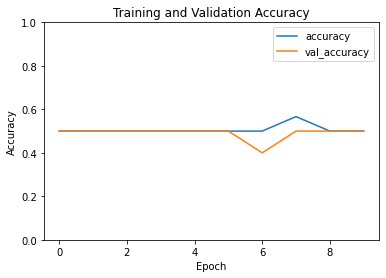

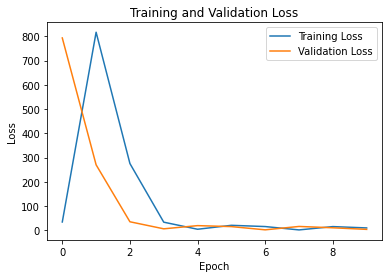

1/1 - 4s - loss: 3.8954 - accuracy: 0.5000


In [19]:
plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylim([0, 1])
plt.legend()

plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)